# Analysis and Reporting - Cardiovascular Disease Dataset

This Jupyter Notebook contains an exploratory data analysis of the Cardiovascular Disease dataset available in [Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset). To make the repository self-contained, the dataset is also directly available in the `dataset/` directory of the project.

## Feature Description

The description of all the features in the dataset is available [in PDF format](../dataset/Cardiovascular_Disease_Dataset_Description.pdf).

## Exploratory Data Analysis

We start by importing the required libraries and loading the dataset. We also convert some of the binary values into human-readable labels so that our analysis is more readable.

In [192]:
%matplotlib inline
import pandas
import seaborn as sns
from matplotlib import pyplot

from utils import add_median_labels

# A nicer plotting style
pyplot.style.use("seaborn-v0_8")
# Select colours for Seaborn charts
sns.set_theme(style="ticks", palette="Set2")

df = pandas.read_csv("../dataset/Cardiovascular_Disease_Dataset.csv")
# Binary values to human readable labels
df["label"] = df["target"].map({0: "No heart disease", 1: "Heart disease"})
df["gender"] = df["gender"].map({0: "Female", 1: "Male"})
# Create 10-year groups.
df["ageGroup"] = pandas.cut(df["age"], bins=range(10, 90, 10))

df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,label,ageGroup
0,103368,53,Male,2,171,0,0,1,147,0,5.3,3,3,1,Heart disease,"(50, 60]"
1,119250,40,Male,0,94,229,0,1,115,0,3.7,1,1,0,No heart disease,"(30, 40]"
2,119372,49,Male,2,133,142,0,0,202,1,5.0,1,0,0,No heart disease,"(40, 50]"
3,132514,43,Male,0,138,295,1,1,153,0,3.2,2,2,1,Heart disease,"(40, 50]"
4,146211,31,Male,1,199,0,0,2,136,0,5.3,3,2,1,Heart disease,"(30, 40]"


We can get some basic details about our dataset such as the number of patients with and without heart disease, the number of patients of each gender, and the age distribution.

### Demographics

In this section we explore the dataset looking at the demography of the patients. We use `age` and `gender` to produce statistics that help us understand how balanced is the data and if there are any biases towards an age group and/or gender.

#### Number of patients with and without heart disease

label
Heart disease       0.58
No heart disease    0.42
Name: proportion, dtype: float64


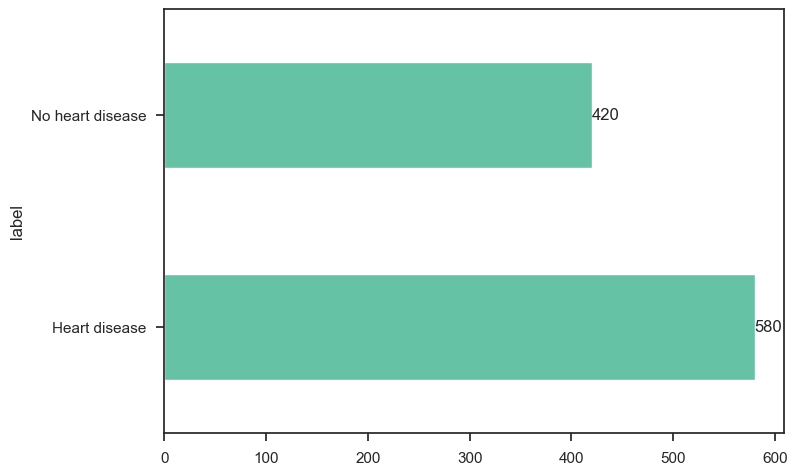

In [193]:
# Plot the number of patients with and without heart disease
hist = df["label"].value_counts().plot.barh()
hist.bar_label(hist.containers[0])
print(df["label"].value_counts(normalize=True))

#### Number of patients of each gender

gender
Male      0.765
Female    0.235
Name: proportion, dtype: float64


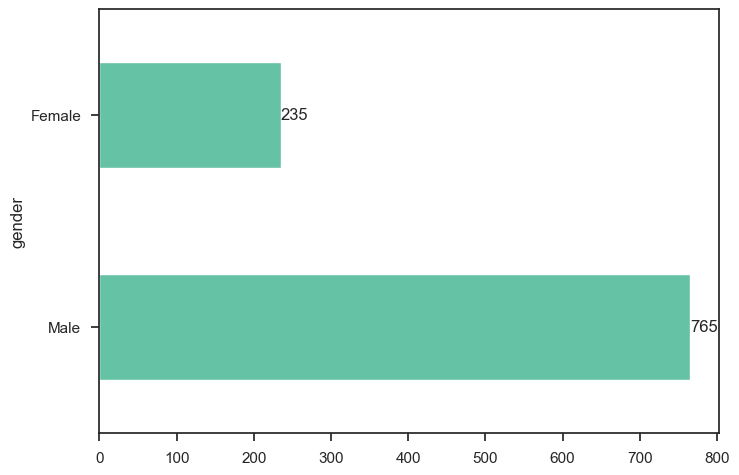

In [194]:
# Plot the number of patients of each gender.
hist = df["gender"].value_counts().plot.barh()
hist.bar_label(hist.containers[0])
print(df["gender"].value_counts(normalize=True))

#### Distribution of ages across genders

gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

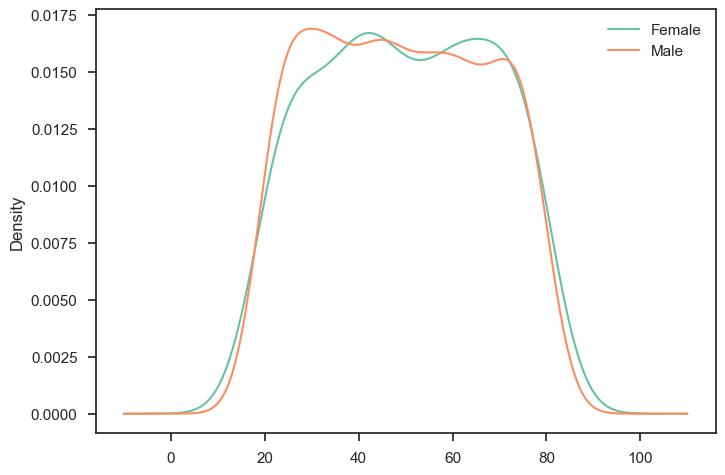

In [195]:
# Plot the distribution of ages (per gender).
df.groupby("gender")["age"].plot(kind="kde", legend=True)

This basic metrics tell us that, although the dataset is well-balanced in terms of age groups, and patients with and without disease, this dataset has a strong bias towards male patients as they conform more than 76% of the total.

#### Distribution of patients with and without disease across genders

As mentioned in the previous section, most of the patients (~76%) are male. If we look at the distribution of ill patients across genders, we can see that the distribution persists.

[Text(0, 0, '0.77069'), Text(0, 0, '0.22931')]

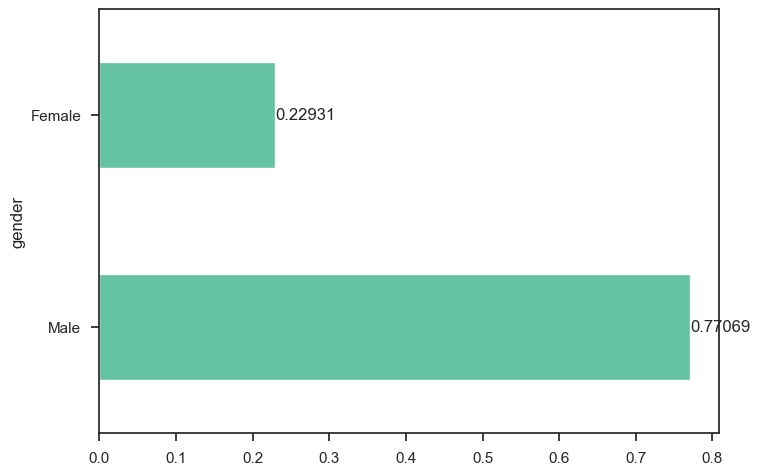

In [196]:
hist =df.loc[df["target"] == 1]["gender"].value_counts(normalize=True).plot.barh()
hist.bar_label(hist.containers[0])

Moreover, the percentages of patients with and without disease is similar between genders:

label   Heart disease  No heart disease
gender                                 
Female            133               102
Male              447               318


<Axes: ylabel='gender'>

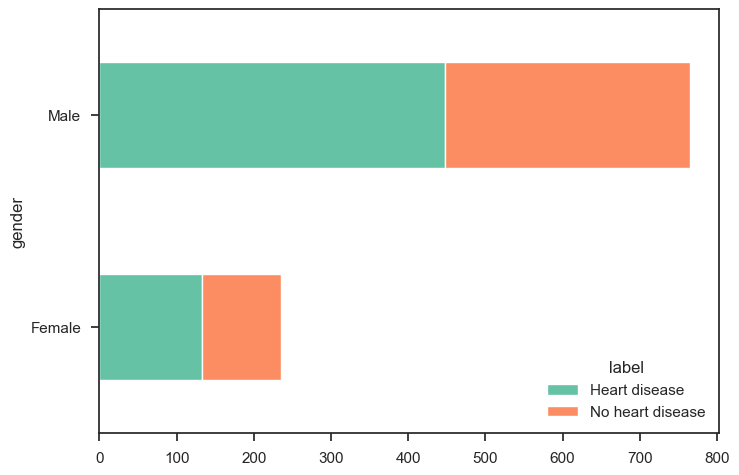

In [197]:
gender_distribution = df.groupby(["gender", "label"])["label"].count().unstack()
print(gender_distribution)
gender_distribution.plot.barh(stacked=True)

label   Heart disease  No heart disease
gender                                 
Female       0.565957          0.434043
Male         0.584314          0.415686
label
Heart disease       0.575136
No heart disease    0.424864
dtype: float64


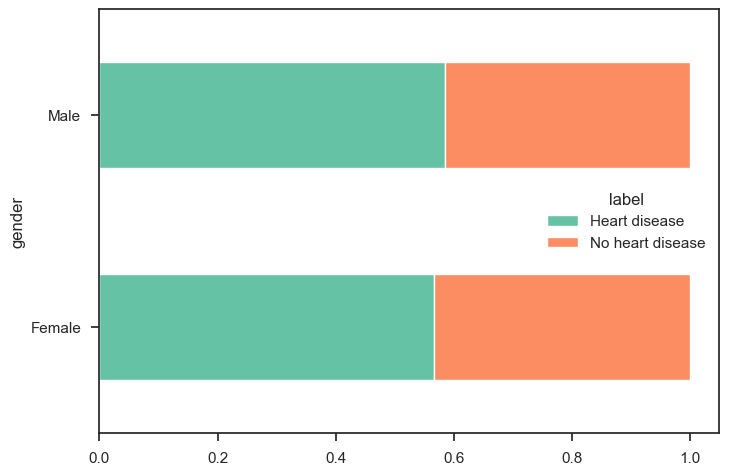

In [198]:
pct_distribution = df.groupby(["gender"])["label"].value_counts(normalize=True).unstack()
print(pct_distribution)
pct_distribution.plot.barh(stacked=True)
print(pct_distribution.mean())

#### Distribution of patients with and without disease across age groups

label     Heart disease  No heart disease
ageGroup                                 
(10, 20]       0.535714          0.464286
(20, 30]       0.517857          0.482143
(30, 40]       0.597561          0.402439
(40, 50]       0.648148          0.351852
(50, 60]       0.587500          0.412500
(60, 70]       0.614379          0.385621
(70, 80]       0.527273          0.472727
label
Heart disease       0.57549
No heart disease    0.42451
dtype: float64


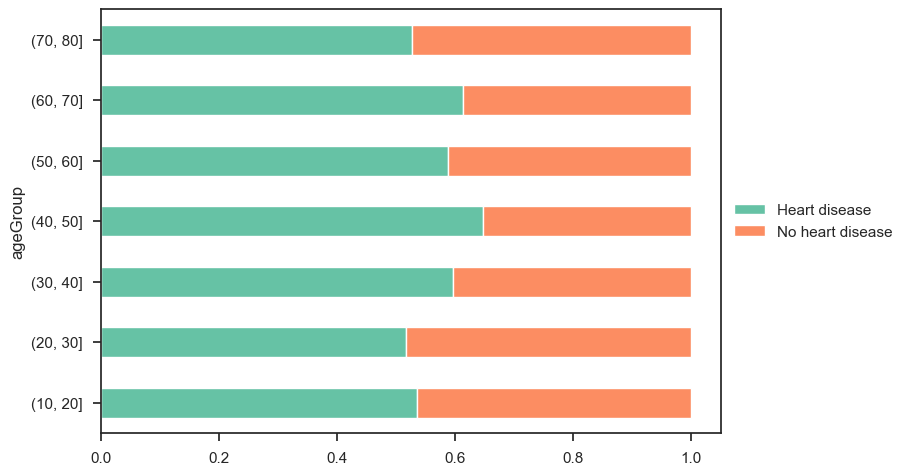

In [199]:
# Distribution of patients with and without disease across age groups.
pct_distribution = df.groupby(["ageGroup"], observed=True)["label"].value_counts(normalize=True).unstack()
print(pct_distribution)
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(pct_distribution.mean())

#### Conclusions

We have observed that:
1. There is a similar number of patients with and without heart disease, 58% and 42% respectively.
2. The dataset contains more male patients, about 76% of the total.
3. The dataset contains more male patients with a heart disease, about 77% of the total.
4. When grouping by gender, the distribution of patients with heart disease is similar across genders, about 57% over the total.
5. When grouping by age groups, the distribution of patients with heart disease is similar across age groups, about 57% over the total.

Given these facts, we conclude that the dataset has been collected/curated to generate an even demographic distribution. It is important to note that there is a bias towards male patients as they represent more than three quarters of the dataset.

Because how evenly distributed the dataset is, and assuming that the features are sufficient to generate a prediction, we should be able to configure a good prediction model as long as we account for gender and age differences to ensure the model is unbiased.

### Analysis of categorical features

In this section we collect basic statistics for the values of all the features in the dataset considering genders and age groups.

#### Number of major vessels

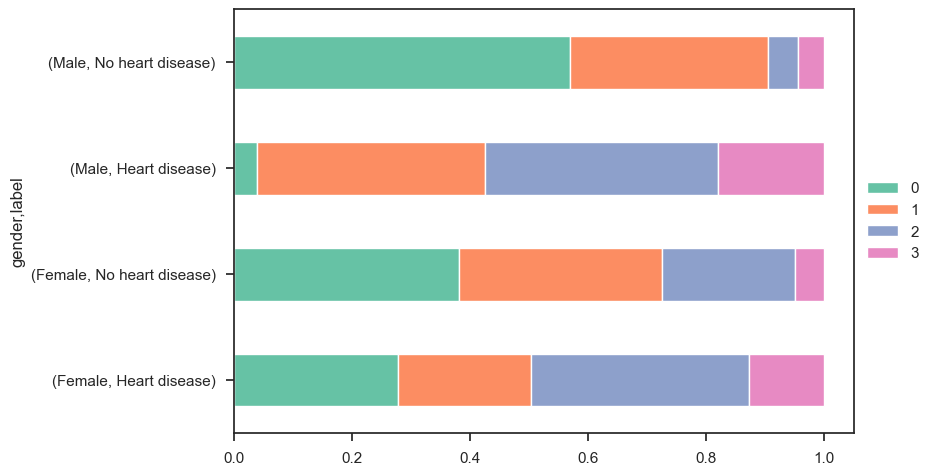

In [200]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["noofmajorvessels"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

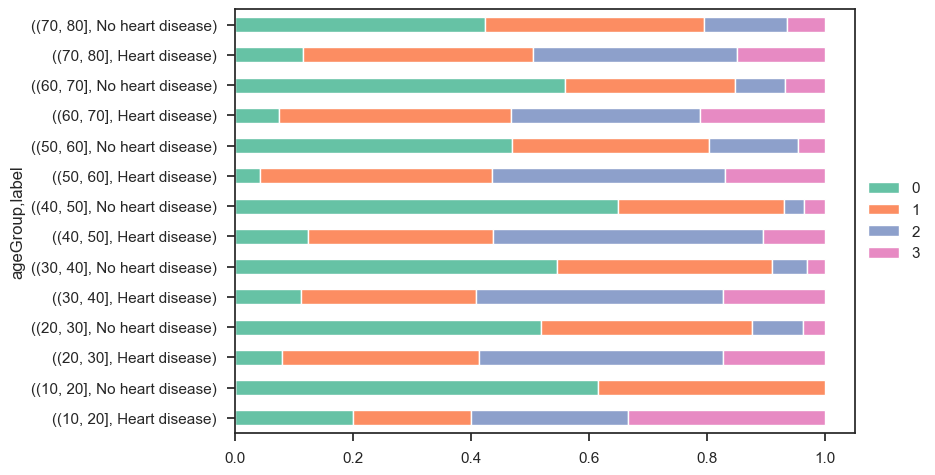

In [201]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["noofmajorvessels"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Slope of the peak exercise ST segment

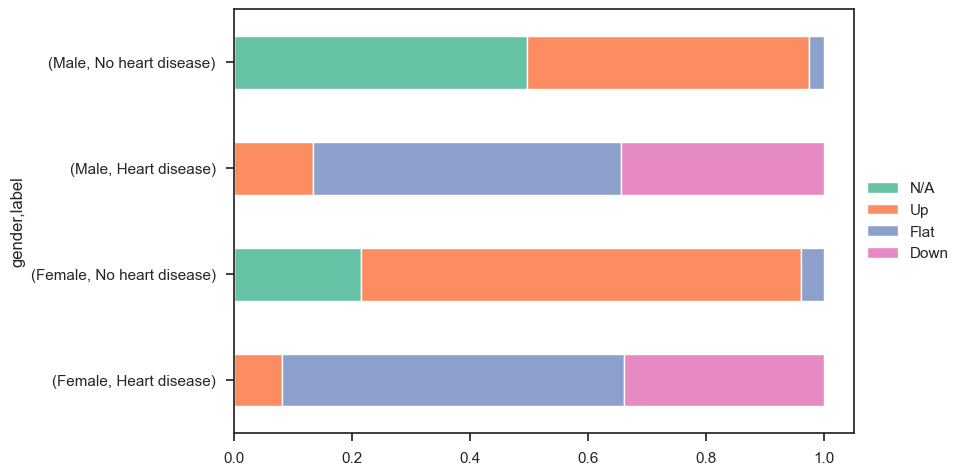

In [202]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["slope"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["N/A", "Up", "Flat", "Down"])

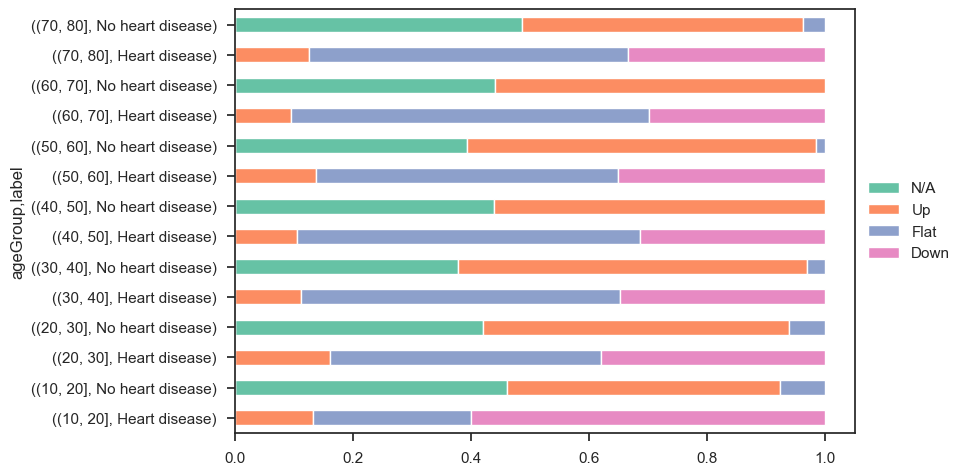

In [203]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["slope"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["N/A", "Up", "Flat", "Down"])

#### Exercise-induced angina

exerciseangia
0    0.484523
1    0.515477
dtype: float64


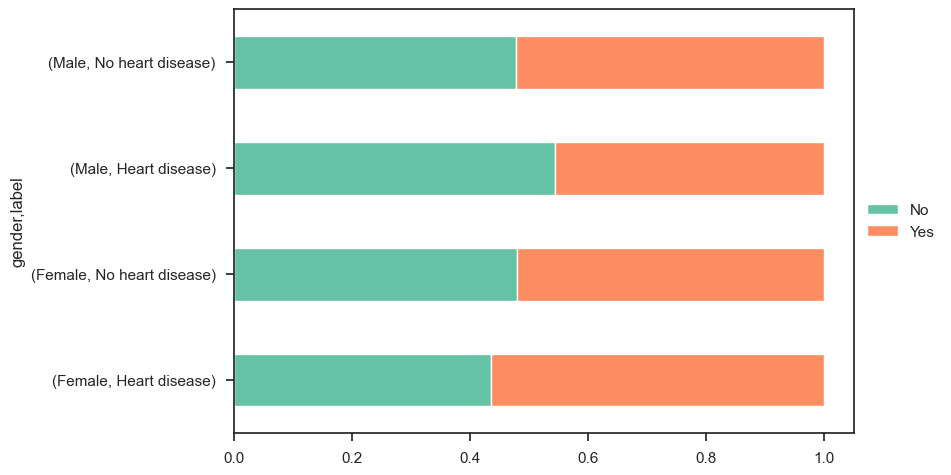

In [204]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["exerciseangia"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["No", "Yes"])
print(pct_distribution.mean())

exerciseangia
0    0.504619
1    0.495381
dtype: float64


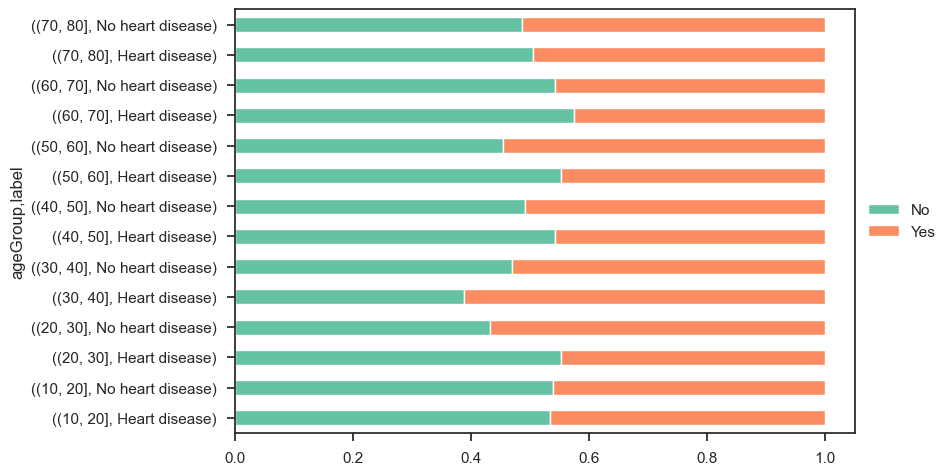

In [205]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["exerciseangia"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["No", "Yes"])
print(pct_distribution.mean())

# Resting electrocardiogram results

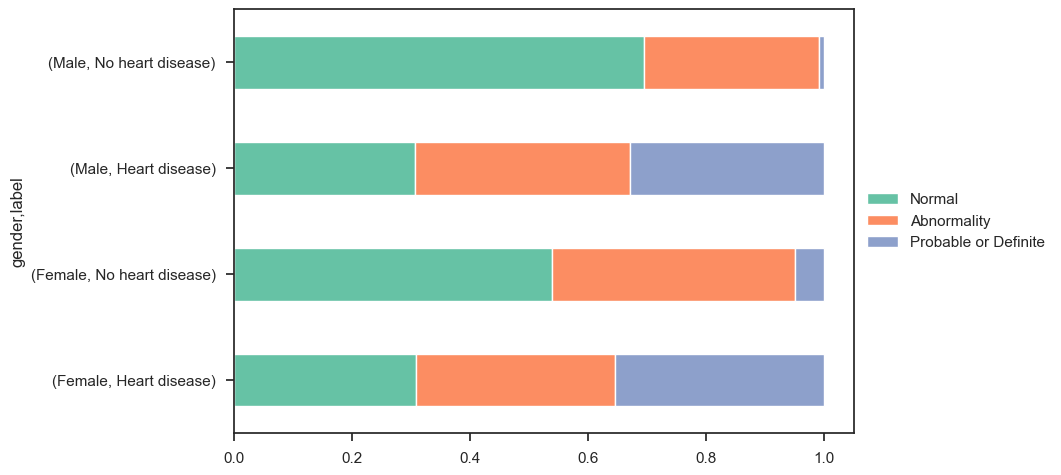

In [206]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["restingrelectro"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Normal", "Abnormality", "Probable or Definite"])

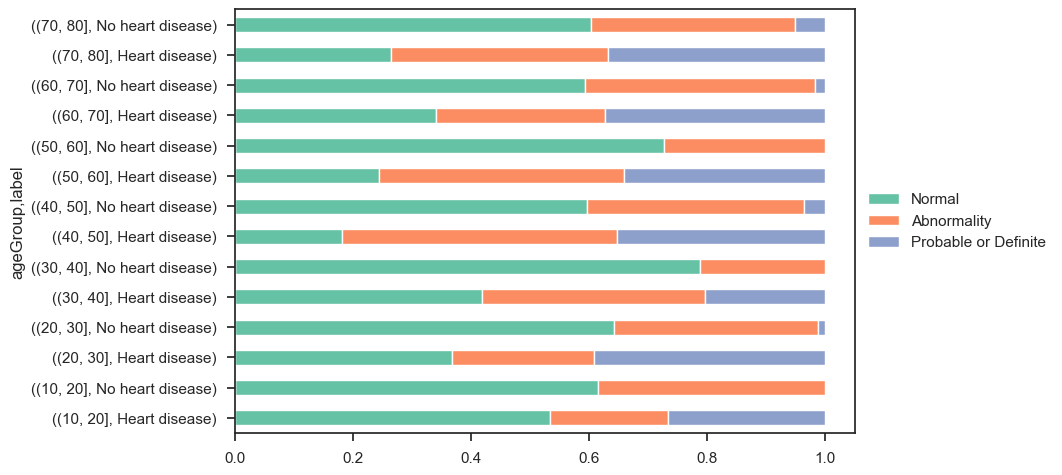

In [207]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["restingrelectro"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Normal", "Abnormality", "Probable or Definite"])

#### Fasting blood sugar

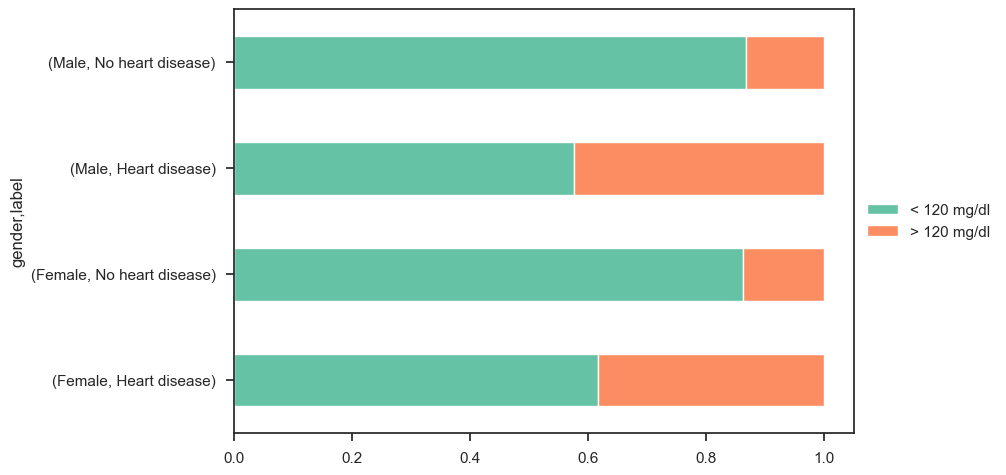

In [208]:

pct_distribution = df.groupby(["gender", "label"], observed=True)["fastingbloodsugar"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["< 120 mg/dl", "> 120 mg/dl"])

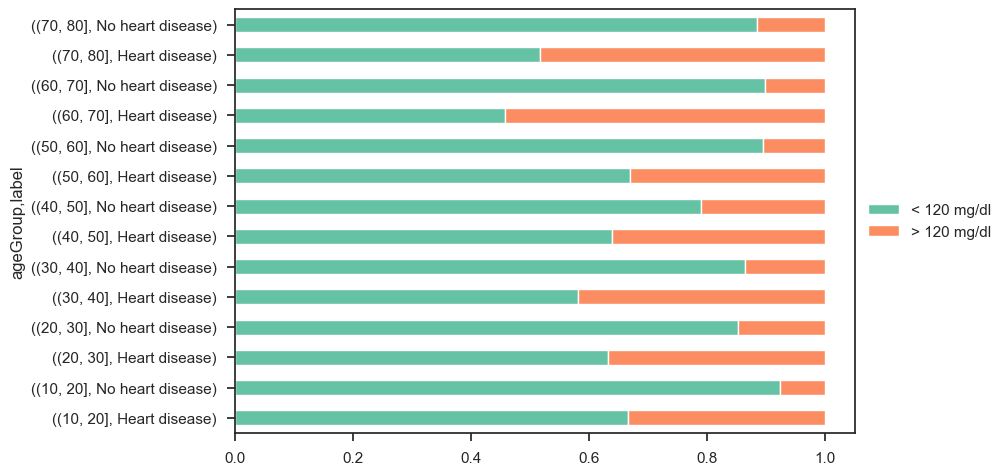

In [209]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["fastingbloodsugar"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["< 120 mg/dl", "> 120 mg/dl"])

#### Chest pain type

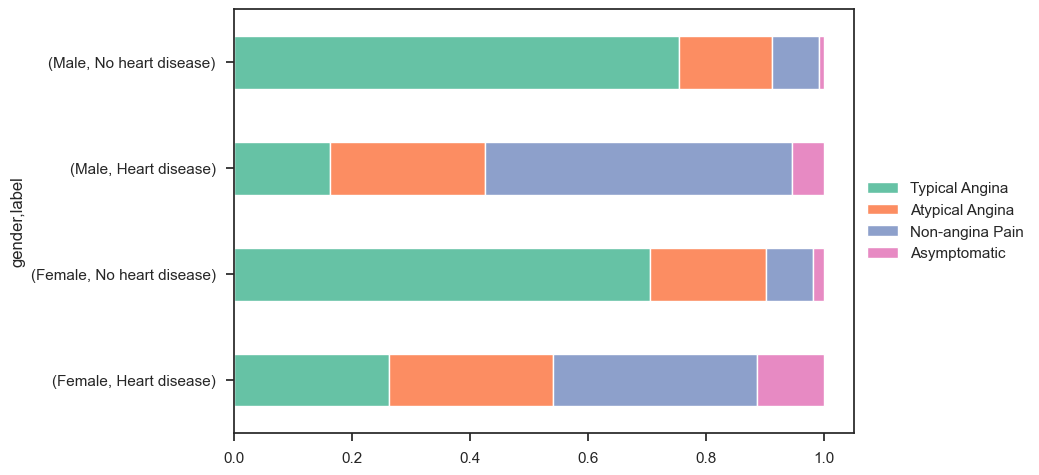

In [210]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["chestpain"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Typical Angina", "Atypical Angina", "Non-angina Pain", "Asymptomatic"])

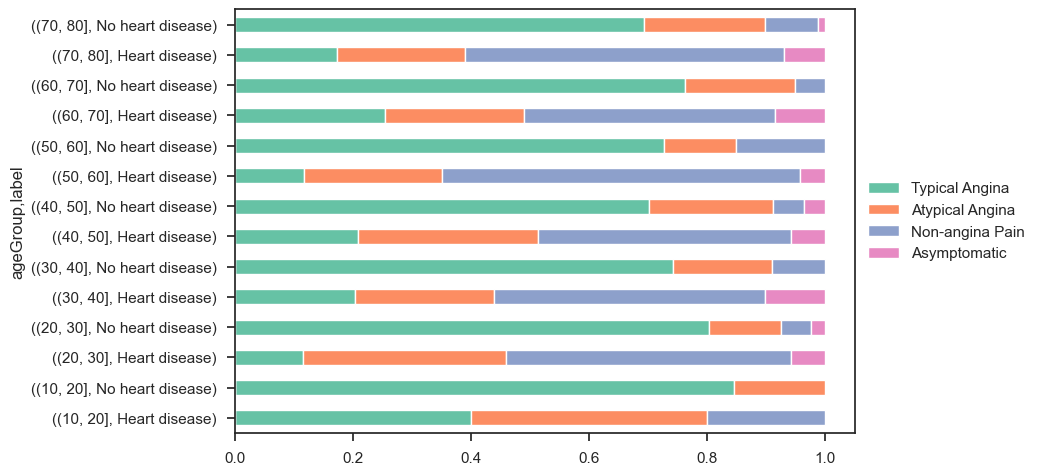

In [211]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["chestpain"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Typical Angina", "Atypical Angina", "Non-angina Pain", "Asymptomatic"])

### Measures of central tendency

#### Old peak

In [230]:
grouped_values = df.groupby(["ageGroup", "gender"], observed=True)["oldpeak"]
pandas.concat([grouped_values.describe(), grouped_values.median().rename("median")], axis=1)

count      mean       std  min    25%   50%    75%  max  \
ageGroup gender                                                            
(10, 20] Female    8.0  2.162500  0.963531  0.4  1.675  2.35  2.825  3.2   
         Male     20.0  2.705000  1.772146  0.1  1.350  2.40  3.925  6.2   
(20, 30] Female   38.0  1.621053  0.942440  0.1  0.800  1.75  2.550  3.2   
         Male    130.0  3.001538  1.744092  0.0  1.525  2.80  4.475  6.2   
(30, 40] Female   34.0  1.582353  0.987642  0.0  0.700  1.75  1.900  3.2   
         Male    130.0  3.007692  1.762997  0.0  1.400  3.40  4.300  6.2   
(40, 50] Female   40.0  1.820000  0.883234  0.1  1.225  1.85  2.450  3.2   
         Male    122.0  3.331148  1.785945  0.0  1.925  3.35  4.875  6.0   
(50, 60] Female   38.0  1.618421  0.822933  0.3  0.825  1.70  2.300  3.2   
         Male    122.0  3.054918  1.858823  0.0  1.300  3.15  4.900  6.1   
(60, 70] Female   37.0  1.640541  1.065223  0.0  1.000  1.70  2.600  3.2   
         Male    116.0  3.080172  1.875203  0.0  1.300  3.10  4.900  6.2   
(70, 80] Female   40.0  1.672500  0.899854  0.0  0.950  1.80  2.400  3.2   
         Male    125.0  2.731200  1.665611  0.0  1.300  2.50  3.900  6.2   

                 median  
ageGroup gender          
(10, 20] Female    2.35  
         Male      2.40  
(20, 30] Female    1.75  
         Male      2.80  
(30, 40] Female    1.75  
         Male      3.40  
(40, 50] Female    1.85  
         Male      3.35  
(50, 60] Female    1.70  
         Male      3.15  
(60, 70] Female    1.70  
         Male      3.10  
(70, 80] Female    1.80  
         Male      2.50

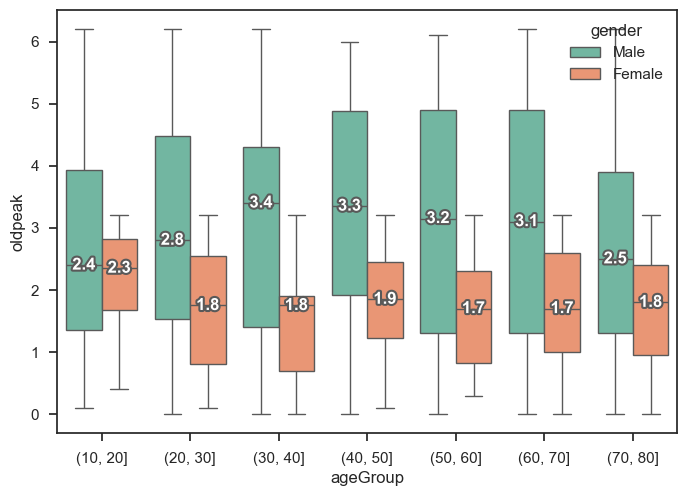

In [224]:
ax = sns.boxplot(data=df, x="ageGroup", y="oldpeak", hue="gender")
add_median_labels(ax)

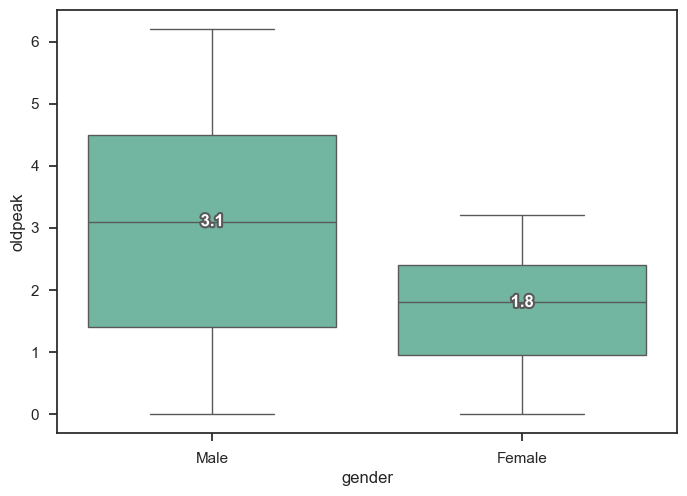

In [238]:
ax = sns.boxplot(data=df, x="gender", y="oldpeak", hue="gender")
add_median_labels(ax)

#### Maximum heart-rate achieved

In [236]:
grouped_values = df.groupby(["ageGroup", "gender"], observed=True)["maxheartrate"]
pandas.concat([grouped_values.describe(), grouped_values.median().rename("median")], axis=1)

count        mean        std   min     25%    50%     75%  \
ageGroup gender                                                              
(10, 20] Female    8.0  149.750000  40.379450  93.0  115.25  154.0  184.50   
         Male     20.0  130.900000  29.618451  74.0  112.50  129.5  150.25   
(20, 30] Female   38.0  148.263158  39.834580  71.0  122.50  149.5  182.50   
         Male    130.0  146.723077  35.188092  72.0  118.25  149.0  175.75   
(30, 40] Female   34.0  151.147059  34.353891  86.0  120.25  162.0  179.50   
         Male    130.0  145.676923  32.724411  72.0  124.25  145.0  173.75   
(40, 50] Female   40.0  133.100000  36.115058  78.0  103.25  126.0  172.25   
         Male    122.0  154.663934  34.294209  72.0  131.75  159.0  184.75   
(50, 60] Female   38.0  141.157895  33.997239  78.0  118.50  137.0  165.50   
         Male    122.0  148.491803  34.008323  71.0  131.00  154.5  175.00   
(60, 70] Female   37.0  137.000000  35.976072  75.0  109.00  134.0  166.00   
         Male    116.0  143.551724  33.141946  71.0  116.50  148.0  168.00   
(70, 80] Female   40.0  138.075000  31.699217  86.0  112.25  138.5  167.25   
         Male    125.0  143.672000  31.913637  71.0  122.00  142.0  171.00   

                   max  median  
ageGroup gender                 
(10, 20] Female  196.0   154.0  
         Male    197.0   129.5  
(20, 30] Female  202.0   149.5  
         Male    202.0   149.0  
(30, 40] Female  200.0   162.0  
         Male    202.0   145.0  
(40, 50] Female  193.0   126.0  
         Male    202.0   159.0  
(50, 60] Female  200.0   137.0  
         Male    201.0   154.5  
(60, 70] Female  198.0   134.0  
         Male    202.0   148.0  
(70, 80] Female  195.0   138.5  
         Male    202.0   142.0

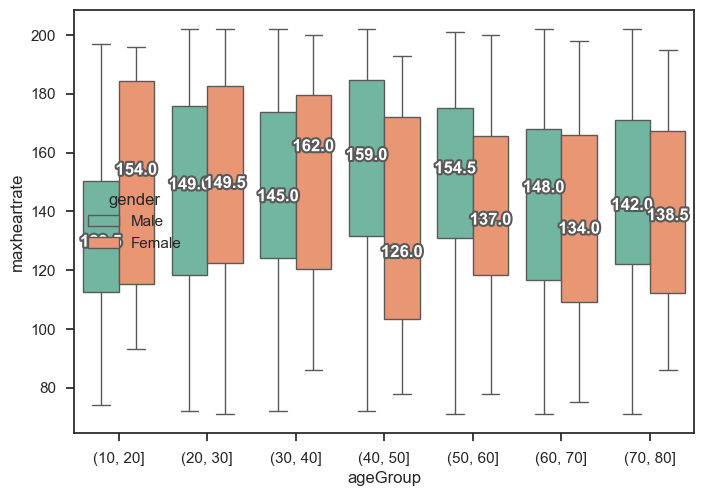

In [213]:
ax = sns.boxplot(data=df, x="ageGroup", y="maxheartrate", hue="gender")
add_median_labels(ax)

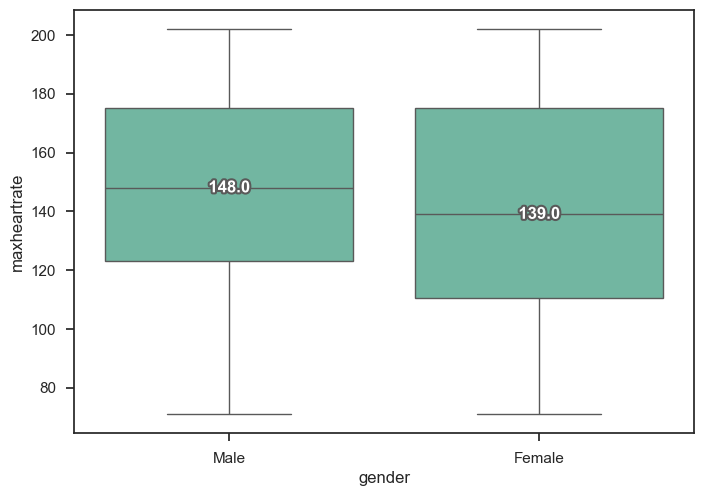

In [240]:
ax = sns.boxplot(data=df, x="gender", y="maxheartrate", hue="gender")
add_median_labels(ax)

#### Serum cholesterol

In [232]:
grouped_values = df.groupby(["ageGroup", "gender"], observed=True)["serumcholestrol"]
pandas.concat([grouped_values.describe(), grouped_values.median().rename("median")], axis=1)

count        mean         std    min     25%    50%     75%  \
ageGroup gender                                                                
(10, 20] Female    8.0  291.250000  162.636975    0.0  242.75  270.5  377.25   
         Male     20.0  277.550000  134.013933    0.0  231.00  283.5  352.50   
(20, 30] Female   38.0  310.736842  144.113822    0.0  191.25  313.5  412.75   
         Male    130.0  306.107692  130.723286    0.0  236.00  296.0  357.00   
(30, 40] Female   34.0  357.235294  106.043747  164.0  284.25  367.0  410.25   
         Male    130.0  296.307692  127.660696    0.0  230.50  291.5  355.50   
(40, 50] Female   40.0  365.950000  132.819320    0.0  277.00  407.0  454.25   
         Male    122.0  296.196721  136.438200    0.0  238.00  296.5  387.75   
(50, 60] Female   38.0  331.763158  136.035455    0.0  226.25  346.5  434.50   
         Male    122.0  302.442623  137.658822    0.0  214.00  325.0  370.75   
(60, 70] Female   37.0  319.135135  135.128779    0.0  244.00  328.0  428.00   
         Male    116.0  311.370690  128.653666    0.0  231.00  316.0  412.50   
(70, 80] Female   40.0  365.775000  145.097578    0.0  319.75  410.5  461.00   
         Male    125.0  307.688000  121.326168    0.0  241.00  309.0  361.00   

                   max  median  
ageGroup gender                 
(10, 20] Female  545.0   270.5  
         Male    512.0   283.5  
(20, 30] Female  559.0   313.5  
         Male    602.0   296.0  
(30, 40] Female  545.0   367.0  
         Male    602.0   291.5  
(40, 50] Female  552.0   407.0  
         Male    560.0   296.5  
(50, 60] Female  537.0   346.5  
         Male    601.0   325.0  
(60, 70] Female  539.0   328.0  
         Male    556.0   316.0  
(70, 80] Female  561.0   410.5  
         Male    601.0   309.0

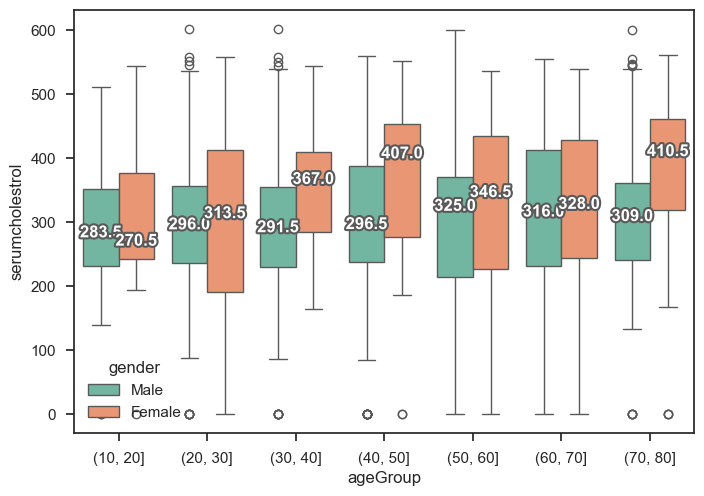

In [214]:
ax = sns.boxplot(data=df, x="ageGroup", y="serumcholestrol", hue="gender")
add_median_labels(ax)

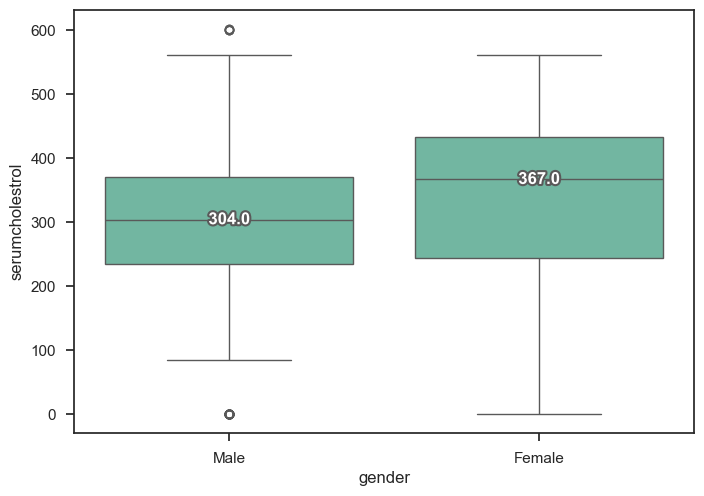

In [239]:
ax = sns.boxplot(data=df, x="gender", y="serumcholestrol", hue="gender")
add_median_labels(ax)

#### Resting blood preasure

In [237]:
grouped_values = df.groupby(["ageGroup", "gender"], observed=True)["restingBP"]
pandas.concat([grouped_values.describe(), grouped_values.median().rename("median")], axis=1)

count        mean        std    min     25%    50%     75%  \
ageGroup gender                                                               
(10, 20] Female    8.0  172.625000  24.100608  136.0  152.00  184.5  189.50   
         Male     20.0  157.400000  25.508306  129.0  136.75  146.5  174.75   
(20, 30] Female   38.0  153.184211  31.170720   95.0  132.50  139.5  188.50   
         Male    130.0  151.930769  29.731144   94.0  128.00  151.0  180.00   
(30, 40] Female   34.0  146.352941  32.208490   94.0  130.00  133.5  187.25   
         Male    130.0  148.630769  29.243468   94.0  126.25  148.0  170.00   
(40, 50] Female   40.0  160.300000  31.510031   94.0  129.75  162.0  190.00   
         Male    122.0  153.295082  28.766282   95.0  130.00  152.0  177.75   
(50, 60] Female   38.0  157.289474  31.958510  104.0  133.00  138.0  191.75   
         Male    122.0  148.934426  28.475519   96.0  127.50  149.0  170.00   
(60, 70] Female   37.0  151.135135  33.169734   94.0  128.00  140.0  187.00   
         Male    116.0  152.862069  28.824174   94.0  130.00  152.0  176.00   
(70, 80] Female   40.0  159.675000  30.052422   98.0  134.75  162.5  186.00   
         Male    125.0  147.008000  31.576455   96.0  124.00  139.0  175.00   

                   max  median  
ageGroup gender                 
(10, 20] Female  198.0   184.5  
         Male    200.0   146.5  
(20, 30] Female  200.0   139.5  
         Male    200.0   151.0  
(30, 40] Female  199.0   133.5  
         Male    200.0   148.0  
(40, 50] Female  200.0   162.0  
         Male    200.0   152.0  
(50, 60] Female  200.0   138.0  
         Male    200.0   149.0  
(60, 70] Female  199.0   140.0  
         Male    200.0   152.0  
(70, 80] Female  195.0   162.5  
         Male    200.0   139.0

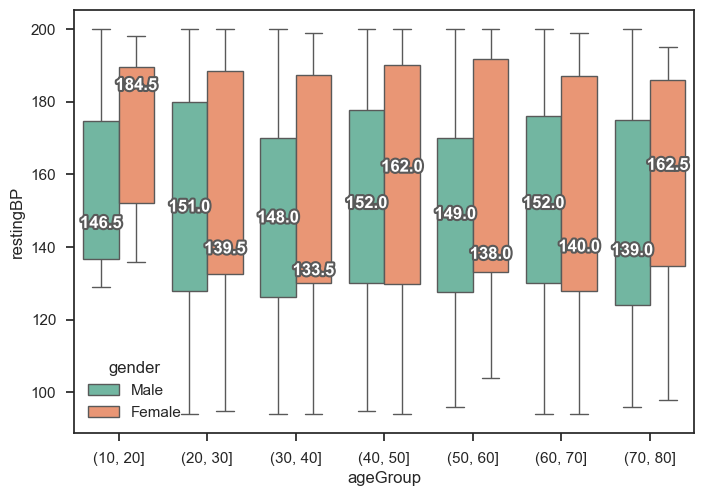

In [215]:
ax = sns.boxplot(data=df, x="ageGroup", y="restingBP", hue="gender")
add_median_labels(ax)

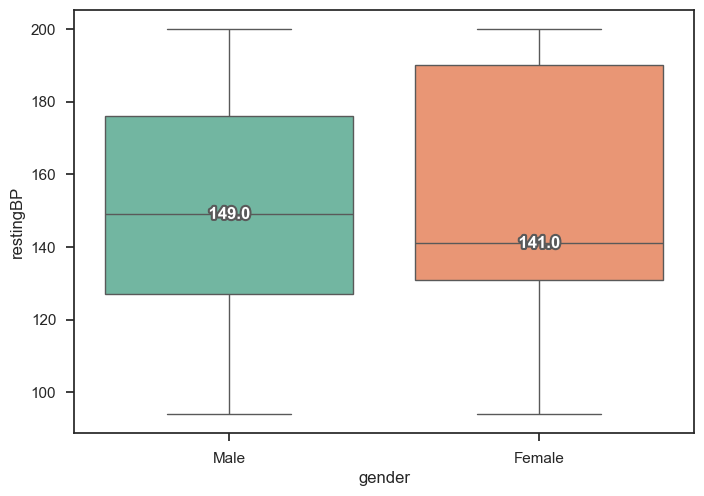

In [241]:
ax = sns.boxplot(data=df, x="gender", y="restingBP", hue="gender")
add_median_labels(ax)

### Correlation matrix

<Axes: >

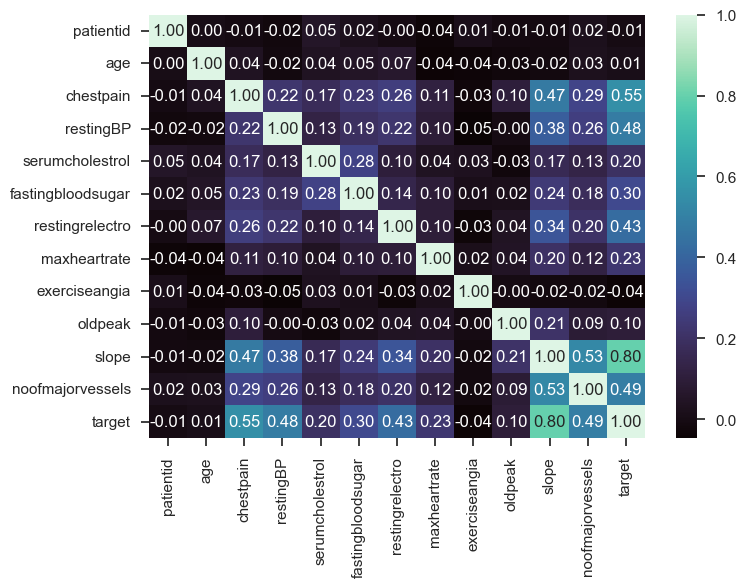

In [216]:
# Generate correlation matrix excluding string and interval columns
exclude_columns = ["label", "gender", "ageGroup"]
correlation_matrix = df.loc[:, ~df.columns.isin(exclude_columns)].corr()
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap="mako")

<Axes: xlabel='oldpeak', ylabel='maxheartrate'>

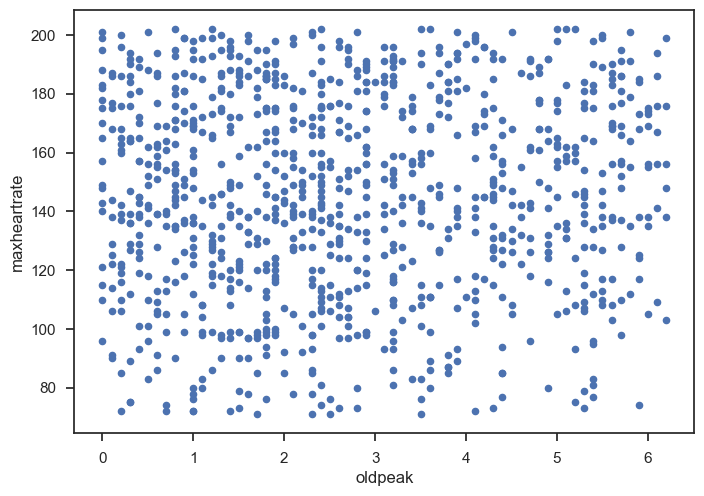

In [217]:
df.plot(kind="scatter", x="oldpeak", y="maxheartrate")

<Axes: xlabel='oldpeak', ylabel='serumcholestrol'>

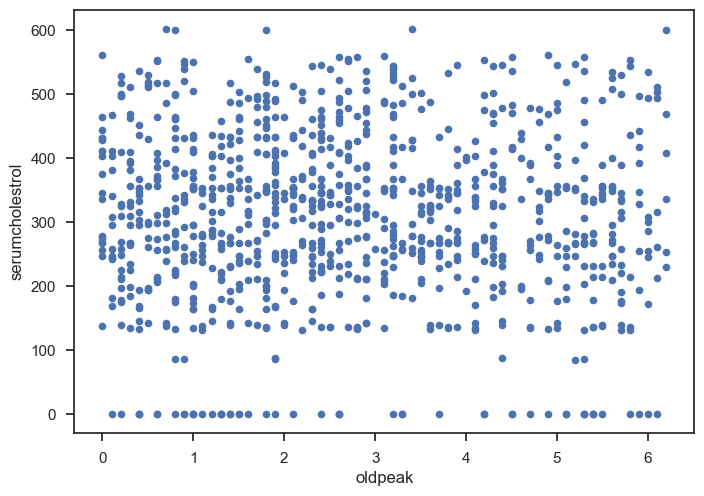

In [218]:
df.plot(kind="scatter", x="oldpeak", y="serumcholestrol")

<Axes: xlabel='oldpeak', ylabel='restingBP'>

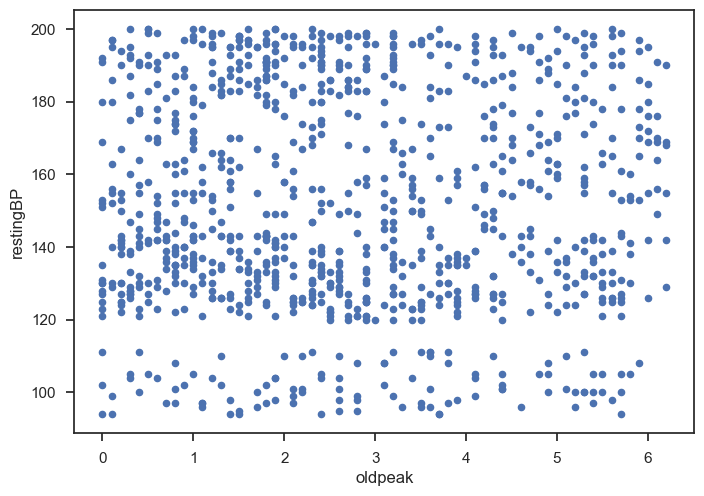

In [219]:
df.plot(kind="scatter", x="oldpeak", y="restingBP")

<Axes: xlabel='maxheartrate', ylabel='serumcholestrol'>

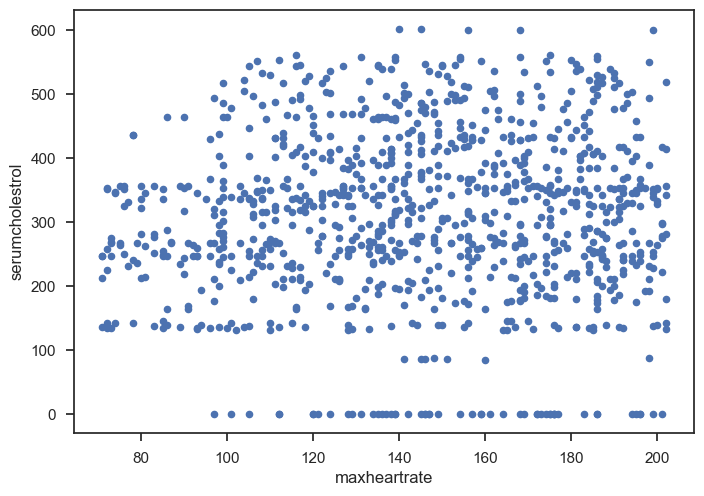

In [220]:
df.plot(kind="scatter", x="maxheartrate", y="serumcholestrol")

<Axes: xlabel='maxheartrate', ylabel='restingBP'>

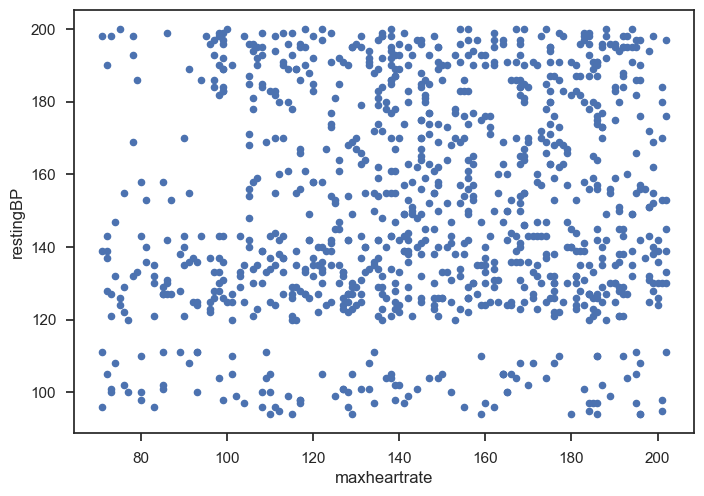

In [221]:
df.plot(kind="scatter", x="maxheartrate", y="restingBP")

<Axes: xlabel='serumcholestrol', ylabel='restingBP'>

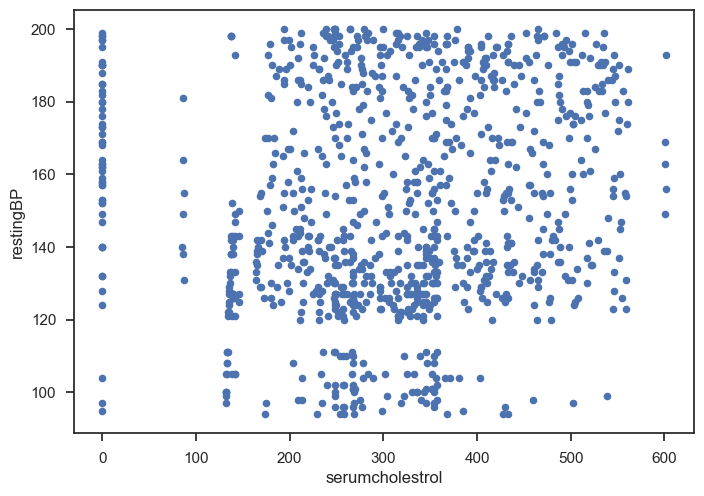

In [222]:
df.plot(kind="scatter", x="serumcholestrol", y="restingBP")